In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [109]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [110]:
import confusion_matrix_pretty_print as cmpp

In [111]:
X_train = pd.read_csv('../subset/X_winetrain.csv', index_col=0)
X_test = pd.read_csv('../subset/X_winetest.csv', index_col=0)
y_train = pd.read_csv('../subset/y_winetrain.csv', header=None, index_col=0, squeeze=True)
y_test = pd.read_csv('../subset/y_winetest.csv', header=None, index_col=0, squeeze=True)

In [112]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 11)
(5197,)
(1300, 11)
(1300,)


In [113]:
from sklearn import tree

In [161]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=6, min_samples_split=5)

In [162]:
%time clf.fit(X_train,y_train)

CPU times: user 22.8 ms, sys: 0 ns, total: 22.8 ms
Wall time: 24.9 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [163]:
y_pred = clf.predict(X_test)

In [164]:
metrics.accuracy_score(y_test, y_pred)

0.5623076923076923

In [165]:
y_test.value_counts()

1    654
0    399
2    247
Name: 1, dtype: int64

# Null Accuracy

In [166]:
y_test.value_counts().head(1) / y_test.count()

1    0.503077
Name: 1, dtype: float64

# Confusion Matrix

In [167]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[227 158  14]
 [109 394 151]
 [  3 134 110]]


In [168]:
labels = ['Ok','Good','Great']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

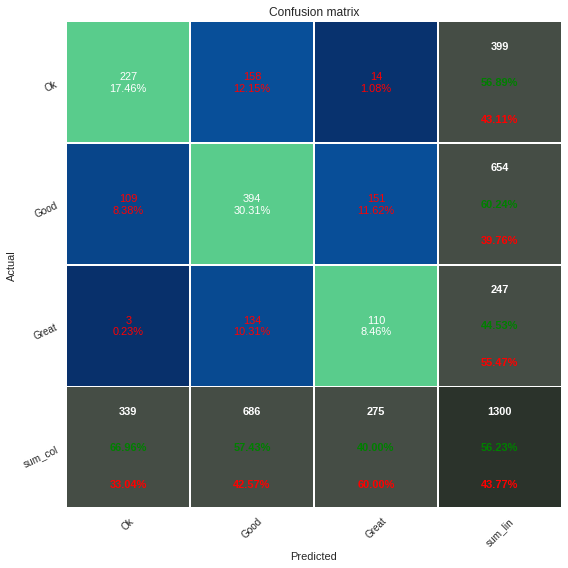

In [194]:
cmpp.pretty_plot_confusion_matrix(df_cm, cmap="Blues_r", show_null_values=1, pred_val_axis='x')

In [195]:
cm.sum(axis=1)

array([399, 654, 247])

In [196]:
np.diag(cm)

array([227, 394, 110])

In [197]:
cm.sum(axis=1) - np.diag(cm)

array([172, 260, 137])

## When Actual = Rows and Predicted = Columns
## TP: Diagonal top left to bottom right
## TN: Values in all columns and rows excluding given Class column and row
## FP: Values in column excluding TP
## FN: Values in row excluding TP

In [198]:
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (TP + FP + FN)

print(TP)
print(FP)
print(FN)
print(TN)

[227 394 110]
[112 292 165]
[172 260 137]
[789 354 888]


## Accuracy: How often correct?  _Diagonal / Total_

In [199]:
print(metrics.accuracy_score(y_test,y_pred))
print(TP.sum() / cm.sum())

0.5623076923076923
0.5623076923076923


## Classification Error: How often incorrect? _Non-Diagonal / Total_

In [200]:
print(1 - metrics.accuracy_score(y_test,y_pred))
print((cm.sum() - np.diag(cm).sum()) / cm.sum())

0.4376923076923077
0.4376923076923077


## Precision: When a positive value is predicted, how often is it correct? _TP / Column Total_

In [201]:
print(metrics.precision_score(y_test,y_pred, average=None))
print(TP / (TP + FP))

[0.66961652 0.57434402 0.4       ]
[0.66961652 0.57434402 0.4       ]


## Sensitivity (Recall or TPR): When actual value is positive, how often is prediction correct? _TP / Row Total_

In [202]:
print(metrics.recall_score(y_test,y_pred, average=None))
print(TP/(TP+FN))

[0.56892231 0.60244648 0.44534413]
[0.56892231 0.60244648 0.44534413]


## False Positive Rate FP / float(TN + FP)
=1 - Specificty

In [203]:
print(FP / (TN + FP))

[0.12430633 0.45201238 0.15669516]


## Specifity TN / float(TN + FP)
When the actual value is negative, how often is the prediction correct?

In [178]:
print(TN / (TN + FP))
print([1,1,1] - (FP / (TN + FP)))

[0.87569367 0.54798762 0.84330484]
[0.87569367 0.54798762 0.84330484]


In [179]:
metrics.matthews_corrcoef(y_test,y_pred)

0.2882529005134189

#### https://www.researchgate.net/post/Multiclass_Confusion_Matrix_Explanation

In [180]:
X_train.shape

(5197, 11)

In [181]:
X = pd.read_csv('../subset/X_wine.csv', index_col=0)
y = pd.read_csv('../subset/y_wine.csv', header=None, index_col=0, squeeze=True)

In [182]:
print(X.shape)
print(y.shape)

(6497, 11)
(6497,)


In [183]:
train_sizes = [50,520,1300,2600,3900,5196]
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [184]:
print(train_scores)
print(validation_scores)

[[1.         0.94       0.94       0.94       0.94      ]
 [0.91346154 0.81538462 0.81538462 0.81538462 0.81538462]
 [0.71153846 0.74769231 0.73230769 0.73230769 0.73230769]
 [0.66461538 0.68846154 0.68038462 0.67653846 0.67653846]
 [0.65282051 0.65487179 0.64717949 0.65333333 0.65153846]
 [0.64126251 0.65916089 0.64376443 0.64395689 0.63394919]]
[[0.36664105 0.50846154 0.46728253 0.4765204  0.4761171 ]
 [0.40353574 0.48692308 0.43802925 0.44726713 0.43682589]
 [0.46963874 0.43846154 0.46805235 0.46728253 0.47380586]
 [0.46656418 0.48076923 0.48190916 0.51963048 0.49075501]
 [0.46963874 0.49461538 0.53117783 0.52193995 0.51617874]
 [0.51421983 0.46692308 0.54965358 0.57505774 0.54468413]]


In [185]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

In [186]:
print(pd.Series(train_scores_mean, index=train_sizes))
print()
print(pd.Series(validation_scores_mean, index=train_sizes))

50      0.952000
520     0.835000
1300    0.731231
2600    0.677308
3900    0.651949
5196    0.644419
dtype: float64

50      0.459005
520     0.442516
1300    0.463448
2600    0.487926
3900    0.506710
5196    0.530108
dtype: float64


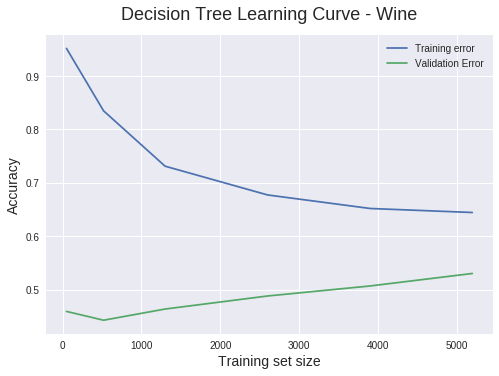

In [193]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Decision Tree Learning Curve - Wine', fontsize = 18, y=1.03)
plt.legend()

In [150]:
clf.max_depth = 10

In [142]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [143]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

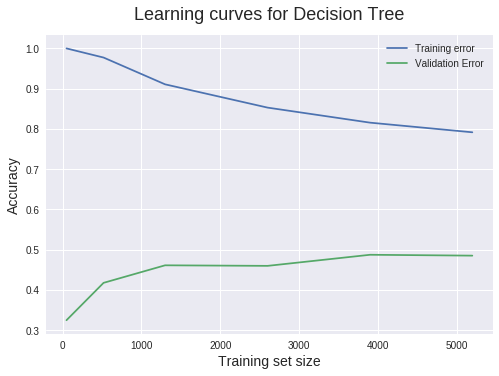

In [144]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [156]:
max_depth = range(1,31)
min_samples_leaf = range(1,6)
min_samples_split = range(2,6)

param_grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
param_grid

{'max_depth': range(1, 31),
 'min_samples_leaf': range(1, 6),
 'min_samples_split': range(2, 6)}

In [157]:
grid = GridSearchCV(clf, param_grid, scoring='accuracy')

In [158]:
grid.fit(X,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 31), 'min_samples_leaf': range(1, 6), 'min_samples_split': range(2, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [159]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.004952,0.000993,0.001073,1.216119e-04,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.463775,0.484303,0.541590,0.496537,0.032924,146,0.497460,0.527130,0.473575,0.499388,0.021906
1,0.006938,0.003936,0.003848,4.077176e-03,1,1,3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.463775,0.484303,0.541590,0.496537,0.032924,146,0.497460,0.527130,0.473575,0.499388,0.021906
2,0.004003,0.000126,0.001103,1.741138e-04,1,1,4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.463775,0.484303,0.541590,0.496537,0.032924,146,0.497460,0.527130,0.473575,0.499388,0.021906
3,0.005196,0.001016,0.001202,1.740193e-04,1,1,5,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.463775,0.484303,0.541590,0.496537,0.032924,146,0.497460,0.527130,0.473575,0.499388,0.021906
4,0.003820,0.000025,0.000900,3.331401e-05,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.463775,0.484303,0.541590,0.496537,0.032924,146,0.497460,0.527130,0.473575,0.499388,0.021906
5,0.003755,0.000064,0.000853,1.132927e-05,1,2,3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.463775,0.484303,0.541590,0.496537,0.032924,146,0.497460,0.527130,0.473575,0.499388,0.021906
6,0.003714,0.000037,0.000864,5.958875e-06,1,2,4,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.463775,0.484303,0.541590,0.496537,0.032924,146,0.497460,0.527130,0.473575,0.499388,0.021906
7,0.003692,0.000085,0.000852,1.529021e-05,1,2,5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.463775,0.484303,0.541590,0.496537,0.032924,146,0.497460,0.527130,0.473575,0.499388,0.021906
8,0.003718,0.000018,0.000847,7.580394e-06,1,3,2,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.463775,0.484303,0.541590,0.496537,0.032924,146,0.497460,0.527130,0.473575,0.499388,0.021906
9,0.003728,0.000021,0.000833,8.920806e-07,1,3,3,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.463775,0.484303,0.541590,0.496537,0.032924,146,0.497460,0.527130,0.473575,0.499388,0.021906


In [160]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')